### Homework 4

In [1]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_258_Repo\\EE_258\\ML_PATH_EE258\\EE258_env\\homework\\HW4'

### Basic Imports from the libraries
    Also prints out the version of the library installed in python

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

print("Tensorflow Version:", tf.__version__)
#print("Keras Version:", keras.__version__)

C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Bar

Tensorflow Version: 2.14.1


### Loads the Dataset from the MNIST Library
    Loads it in terms of training and testing pools. 
    Also prints out the shape information of the newly created variables


In [3]:
from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


### Visualize an example from the MNIST 28x28 Dataset:
    The code below plots the second number in the image dataset.
    Per the homework, the index was changed to portray a different number, and that number 
    is 4
    

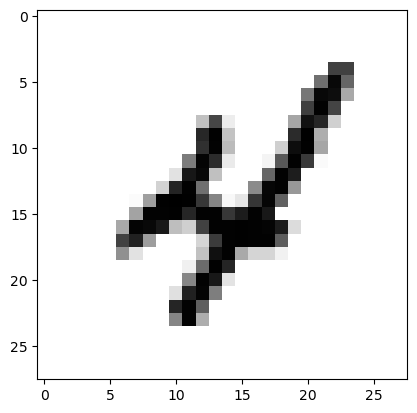

In [4]:
plt.imshow(Xtrain[9].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

### The below code analyzes and visualizes the distribution of digit labels in your training dataset (ytrain) — for example, how many times each digit (0–9) appearsand then graphs it.

distribution of train data: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
distribution of test data {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


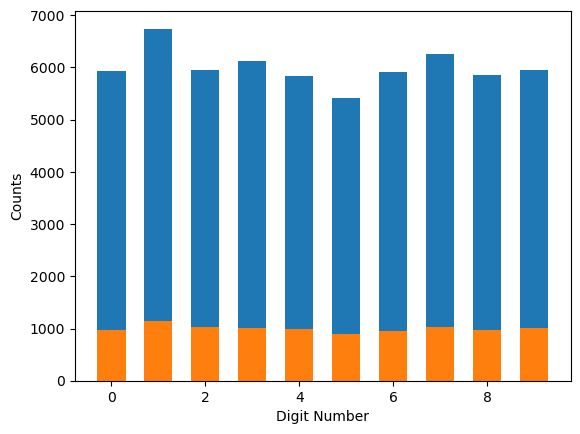

In [5]:
digit_train, counts_train = np.unique(ytrain, return_counts = True)
digit_test, counts_test = np.unique(ytest, return_counts= True)


distribution_train = dict(zip(digit_train, counts_train))
print("distribution of train data:", distribution_train )

distribution_test = dict(zip(digit_test, counts_test))
print("distribution of test data", distribution_test)

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')

plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')


plt.show()

### This asserts the train and test split of the MNIST Dataset. 

In [6]:
#test size 1/12 = 55k train / 5k test
#test size = 1/6 = 50k train / 5k test

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/6, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(50000, 784) (10000, 784)
[8 5 1 ... 0 0 4] [7 3 8 ... 9 8 1]


### This portion of the code sets up the infrastructure of the Nueral Network

In [7]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)
from tensorflow.keras.optimizers import SGD


model = keras.models.Sequential()

model.add(keras.layers.Dense(300, activation="sigmoid", input_shape=(784,)))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

sgd = SGD(learning_rate=0.1)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



In [8]:
model.fit(X_train, y_train, batch_size=128, epochs=15, validation_data =(X_val,y_val))


Epoch 1/15
391/391 [==============================] - 2s 4ms/step - loss: 1.7740 - accuracy: 0.3722 - val_loss: 0.9011 - val_accuracy: 0.7205
Epoch 2/15
391/391 [==============================] - 2s 4ms/step - loss: 0.6416 - accuracy: 0.7958 - val_loss: 0.5087 - val_accuracy: 0.8355
Epoch 3/15
391/391 [==============================] - 2s 4ms/step - loss: 0.4303 - accuracy: 0.8705 - val_loss: 0.4332 - val_accuracy: 0.8640
Epoch 4/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3786 - accuracy: 0.8882 - val_loss: 0.4723 - val_accuracy: 0.8534
Epoch 5/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3460 - accuracy: 0.8980 - val_loss: 0.3389 - val_accuracy: 0.8982
Epoch 6/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3208 - accuracy: 0.9054 - val_loss: 0.3059 - val_accuracy: 0.9092
Epoch 7/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3019 - accuracy: 0.9110 - val_loss: 0.3008 - val_accuracy: 0.9102
Epoch 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 419110 (1.60 MB)
Trainable params: 419110 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     

Accuracy: 0.934


In [11]:
from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred))


313/313 [==============================] - 1s 2ms/step
Confusion Matrix
[[ 956    0    3    1    0   10    9    1    0    0]
 [   0 1116    3    2    0    2    4    2    6    0]
 [   8    3  980    4    9    1    9    6   11    1]
 [   0    2   34  883    0   62    1   10   17    1]
 [   1    2    4    0  937    1   10    2    5   20]
 [   6    2    2   10    5  830   10    0   22    5]
 [   9    3    7    0    8   20  908    0    3    0]
 [   3   14   32    4    3    1    0  953    1   17]
 [   5    9    8   19    8   40    7    4  873    1]
 [   9   11    2    8   45    9    0    8    8  909]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.95      0.93      1032
           3       0.95      0.87      0.91      1010
           4       0.92      0.95      0.94       982
           5       0.85      0.93      0.89       

### OPTIMIZED VERSION

In [23]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)

Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


In [24]:
#test size 1/12 = 55k train / 5k test
#test size = 1/6 = 50k train / 5k test

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/6, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(50000, 784) (10000, 784)
[8 5 1 ... 0 0 4] [7 3 8 ... 9 8 1]


In [25]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)
from tensorflow.keras.optimizers import SGD


from tensorflow import keras

# Common training parameters
input_shape = (784,)
num_classes = 10

# Model 1: 300-300-300 (sigmoid, sigmoid, relu)
model1 = keras.models.Sequential([
    keras.layers.Dense(300, activation="sigmoid", input_shape=input_shape),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

# Model 2: 128-64 (relu)
model2 = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=input_shape),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

# Model 3: 512-256-128-64 (relu)
model3 = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=input_shape),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

# Model 4: 256-256 (tanh)
model4 = keras.models.Sequential([
    keras.layers.Dense(256, activation="tanh", input_shape=input_shape),
    keras.layers.Dense(256, activation="tanh"),
    keras.layers.Dense(num_classes, activation="softmax")
])

# Compile all models
models = [model1, model2, model3, model4]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"Model {i} compiled successfully.")

sgd = SGD(learning_rate=0.1)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')

#------------------------------------------------------------------
# Define a new optimizer for each model and compile
for i, model in enumerate(models, start=1):
    optimizer = SGD(learning_rate=0.1)  # fresh optimizer instance
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"Model {i} compiled successfully with new SGD instance.")

# Normalize input data
#X_train = X_train.astype('float32') / 255.0
#X_val = X_val.astype('float32') / 255.0

# Ensure labels are uint type
y_train = y_train.astype('uint')
y_val = y_val.astype('uint')

Model 1 compiled successfully.
Model 2 compiled successfully.
Model 3 compiled successfully.
Model 4 compiled successfully.
Model 1 compiled successfully with new SGD instance.
Model 2 compiled successfully with new SGD instance.
Model 3 compiled successfully with new SGD instance.
Model 4 compiled successfully with new SGD instance.


In [26]:
batch_size = 128
epochs = 15

# Train each model
for i, model in enumerate(models, start=1):
    print(f"\nTraining Model {i}...\n")
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val))


Training Model 1...

Epoch 1/15
391/391 [==============================] - 2s 5ms/step - loss: 1.8682 - accuracy: 0.3366 - val_loss: 0.9525 - val_accuracy: 0.6845
Epoch 2/15
391/391 [==============================] - 2s 4ms/step - loss: 0.6987 - accuracy: 0.7697 - val_loss: 0.5519 - val_accuracy: 0.8287
Epoch 3/15
391/391 [==============================] - 2s 4ms/step - loss: 0.4594 - accuracy: 0.8627 - val_loss: 0.5095 - val_accuracy: 0.8266
Epoch 4/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3888 - accuracy: 0.8861 - val_loss: 0.4287 - val_accuracy: 0.8664
Epoch 5/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3539 - accuracy: 0.8956 - val_loss: 0.3282 - val_accuracy: 0.9031
Epoch 6/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3307 - accuracy: 0.9026 - val_loss: 0.3395 - val_accuracy: 0.9004
Epoch 7/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3079 - accuracy: 0.9102 - val_loss: 0.3042 - val_a

In [27]:
# Normalize test data
X_test = Xtest.astype('float32') / 255.0
y_test = ytest.astype('uint')

# Evaluate each model on the test set
for i, model in enumerate(models, start=1):
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Model {i} - Test Accuracy: {acc:.3f}")

Model 1 - Test Accuracy: 0.937
Model 2 - Test Accuracy: 0.975
Model 3 - Test Accuracy: 0.982
Model 4 - Test Accuracy: 0.974
